In [1]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import fcluster
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
## Inspired by Stats346 lec 7 and http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

In [3]:
output_folder = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project/network_outputs/2018-01-25_19-20-47" #2018-01-24_08-15-33"

In [58]:
# Pick top positive regulator: FBgn0001981	FBgn0000042
tf = 'FBgn0001981'
target = 'FBgn0000042'

In [7]:
act = pd.read_csv(os.path.join(output_folder, 'activity.tsv'), sep='\t', index_col = 0)

In [54]:
exp= pd.read_csv(os.path.join(output_folder, 'expression.tsv'), sep='\t', index_col = 0)

In [55]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(act.transpose())
scaled_df = pd.DataFrame(scaled_df.transpose(), columns=act.columns, index=act.index)

In [46]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(act.transpose())

166

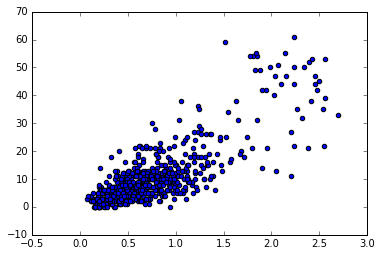

In [35]:

plt.scatter(act.loc[tf, :], exp.loc[target, :])

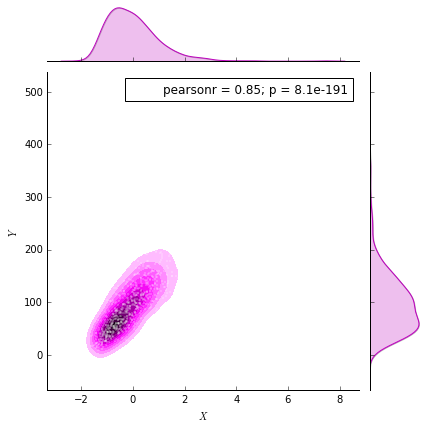

In [59]:
df = pd.DataFrame({'x':scaled_df.loc[tf, :], 'y':exp.loc[target, :]})
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=2, linewidth=.2, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

In [20]:
sum(exp.loc[target, :] == 0)

16

In [29]:
tf = 'FBgn0038766'
target = 'FBgn0261791'

(array([ 168.,  214.,  173.,   80.,   21.,   12.,    5.,    6.,    0.,    1.]),
 array([   9. ,   54.3,   99.6,  144.9,  190.2,  235.5,  280.8,  326.1,
         371.4,  416.7,  462. ]),
 <a list of 10 Patch objects>)

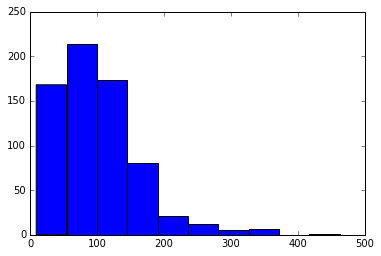

In [23]:
plt.hist(exp.loc[target, :])

In [26]:
exp.mean(axis=1)

FBgn0039266     1.907353
FBgn0039265     2.913235
FBgn0031006     0.227941
FBgn0025558     1.325000
FBgn0016978     1.267647
FBgn0033155     0.119118
FBgn0283500     0.429412
FBgn0015714     0.113235
FBgn0037719     0.126471
FBgn0051710     0.273529
FBgn0051712     1.163235
FBgn0051715     3.326471
FBgn0051717     1.463235
FBgn0034976     0.186765
FBgn0029736     0.461765
FBgn0037018     0.595588
FBgn0025629     1.535294
FBgn0004907    40.635294
FBgn0266580     0.994118
FBgn0050342     0.910294
FBgn0033121     0.304412
FBgn0034722     0.827941
FBgn0037142     0.179412
FBgn0037149     1.152941
FBgn0034035     0.545588
FBgn0046214    17.891176
FBgn0035592     3.035294
FBgn0035588     0.604412
FBgn0037779     0.798529
FBgn0037809     0.297059
                 ...    
FBgn0267791     2.726471
FBgn0031651     1.455882
FBgn0053002     3.542647
FBgn0036853     1.338235
FBgn0016119    13.047059
FBgn0035335     1.904412
FBgn0030786     2.205882
FBgn0266452     1.239706
FBgn0004657     1.529412


In [28]:
np.mean(exp.loc[target, :])

99.91617647058824

In [ ]:
fig = sm.graphics.influence_plot(prestige_model, ax=ax, criterion="cooks")